## Observations and Insights

The more effective treatments: Capomulin and Ramicane have more data points.
There's a positive correlation between mouse weight and tumor volume.
There's a even number of male and female mice in the study.
The more effective treatments also had smaller variances.
Ketapril was the worst treatment.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_mouse_study_df = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen")

mean = grouped_mouse_study_df.mean()
median = grouped_mouse_study_df.median()

Summary_statistics_df = pd.merge(mean, median, on="Drug Regimen", suffixes= [" Mean", " Median"])

variance = grouped_mouse_study_df.var()
Standard_deviation = grouped_mouse_study_df.std()

var_std_table = pd.merge(variance, Standard_deviation, on="Drug Regimen", suffixes=[" Variance", " Standard Deviation"])

Summary_statistics_df = pd.merge(Summary_statistics_df, var_std_table, on="Drug Regimen")

SEM = grouped_mouse_study_df.sem()

Summary_statistics_df = pd.merge(Summary_statistics_df, SEM, on="Drug Regimen")

Summary_statistics_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) SEM"}, inplace=True)

Summary_statistics_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

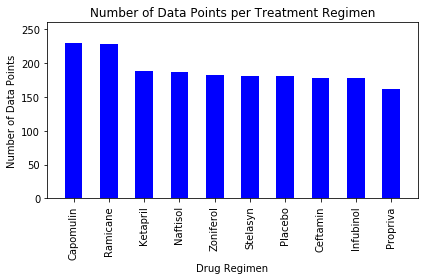

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_study_df["Drug Regimen"].value_counts().plot(kind="bar", color = "blue", title="Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()

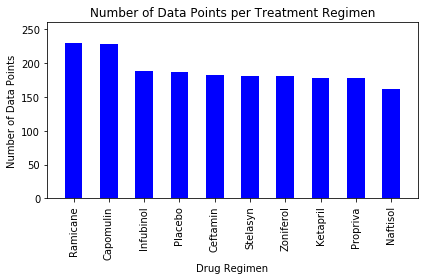

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(mouse_study_df["Drug Regimen"].unique(), mouse_study_df["Drug Regimen"].value_counts(), color ="blue", align="center", width=0.5)
plt.xticks(rotation="vertical")
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()
plt.show()

## Pie plots

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

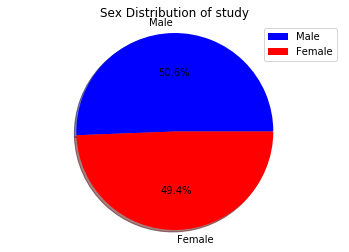

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study_df["Sex"].value_counts().plot(kind="pie", colors=["blue", "red"], shadow=True, autopct="%1.1f%%",
                                          title="Sex Distribution of study")
plt.legend(loc="best")
plt.ylabel("")
plt.axis("equal")

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

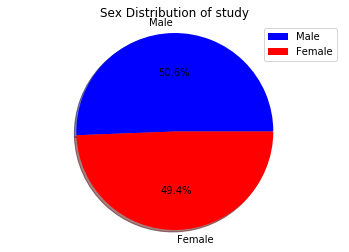

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_df["Sex"].value_counts(), labels= mouse_study_df["Sex"].unique(), colors=["blue", "red"], shadow=True,
       autopct="%1.1f%%")
plt.title("Sex Distribution of study")
plt.legend(loc="best")
plt.axis("equal")

## Quartiles, outliers and boxplots

In [9]:
final_timepoints_a = mouse_study_df.reset_index()
final_timepoints_a = final_timepoints_a.loc[:, ["index","Mouse ID","Timepoint"]]
final_timepoints_a["index"] = final_timepoints_a["index"].astype(str)
final_timepoints_a = final_timepoints_a.groupby("Mouse ID").max()
final_timepoints_a["index"] = final_timepoints_a["index"].astype(int)


final_timepoints_b = mouse_study_df.reset_index()
del final_timepoints_b["Timepoint"]

final_timepoints_C = pd.merge(final_timepoints_a, final_timepoints_b, on="index", how="left")

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_timepoints = final_timepoints_C.loc[((mouse_study_df["Drug Regimen"] == "Capomulin") | \
                                       (mouse_study_df["Drug Regimen"] == "Ramicane") | \
                                       (mouse_study_df["Drug Regimen"] == "Infubinol") | \
                                       (mouse_study_df["Drug Regimen"] == "Ceftamin")), \
                                      ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_timepoints

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686
...,...,...,...
244,z435,Propriva,48.710661
245,z578,Ramicane,30.638696
246,z581,Infubinol,62.754451
247,z795,Naftisol,65.741070


In [9]:
quartiles = final_timepoints["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

outliers = final_timepoints.loc[(final_timepoints["Tumor Volume (mm3)"] < lowerbound) | \
                                final_timepoints["Tumor Volume (mm3)"] > upperbound,:]
if len(outliers) > 0:
    print("There are potential outliers")
else:
    print("There are no outliers.")

There are no outliers.


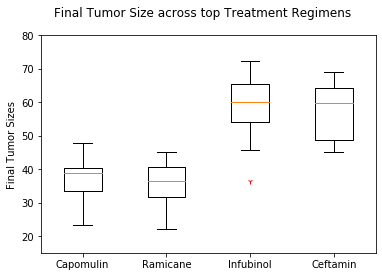

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Capomulin",["Tumor Volume (mm3)"]]
Ramicane = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Ramicane",["Tumor Volume (mm3)"]]
Infubinol = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Infubinol",["Tumor Volume (mm3)"]]
Ceftamin = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Ceftamin",["Tumor Volume (mm3)"]]

top_regimens = [Capomulin["Tumor Volume (mm3)"], Ramicane["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"],
                Ceftamin["Tumor Volume (mm3)"]]

red_tri = dict(markerfacecolor="red", markeredgecolor= "red", marker= "1")


fig, ax1 = plt.subplots(sharey=True)
fig.suptitle("Final Tumor Size across top Treatment Regimens")


ax1.boxplot(top_regimens, flierprops=red_tri)
ax1.set_ylabel("Final Tumor Sizes")
ax1.set(xticklabels=["Capomulin", "Ramicane","Infubinol", "Ceftamin"])
ax1.set_ylim(15, 80)
            
plt.show()

In [11]:
top_regimens

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    40.343948
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64, 0      67.97341

## Line and scatter plots

Which mouse would you like to look for? ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157'] s185


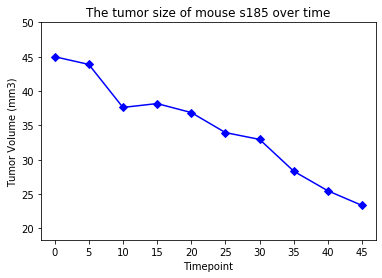

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                           ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

mouse_id = input(f"Which mouse would you like to look for? {mouse['Mouse ID'].unique()} ")

mouse = mouse.loc[mouse["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], color = "blue", marker="D")
plt.title(f"The tumor size of mouse {mouse_id} over time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.xlim(-2, 47)
plt.ylim(min(mouse["Tumor Volume (mm3)"])-5, max(mouse["Tumor Volume (mm3)"])+5)
plt.xticks(np.arange(0,50,5))

plt.show()

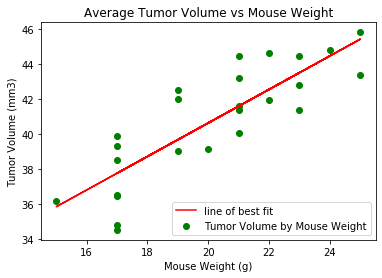

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                                  ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight = mouse_weight.groupby("Mouse ID").mean()


plt.scatter(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"], marker='o', color='green', label="Tumor Volume by Mouse Weight")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
regress_value = slope * mouse_weight["Weight (g)"] + intercept
plt.plot(mouse_weight["Weight (g)"], regress_value, color="red", label="line of best fit")
plt.legend(loc="best")

plt.show()

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
round(correlation[0],2)

0.84